In [1]:
# conda activate covid19
import numpy as np
import pandas as pd
import matplotlib
np.__version__, pd.__version__, matplotlib.__version__

('1.19.2', '1.2.2', '3.3.4')

In [2]:
phuDf = pd.read_csv('PublicHealthUnits.csv',
                   header=0,
                   index_col='Reporting_PHU_ID')

In [3]:
phuDf.head(10)

,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
Reporting_PHU_ID,,,,,,,
2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2236,Halton Region Health Department,1151 Bronte Road,Oakville,L6M 3Ll,www.halton.ca/For-Residents/Public-Health/,43.413997,-79.744796
2241,"Kingston, Frontenac and Lennox & Addington Pub...",221 Portsmouth Avenue,Kingston,K7M 1V5,www.kflaph.ca,44.227874,-76.525211
2266,Wellington-Dufferin-Guelph Public Health,160 Chancellors Way,Guelph,N1G 0E1,www.wdgpublichealth.ca,43.524881,-80.233743
3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2233,Grey Bruce Health Unit,101 17th Street East,Owen Sound,N4K 0A5,www.publichealthgreybruce.on.ca/,44.576196,-80.940980
2268,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670
4913,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
2237,Hamilton Public Health Services,"110 King St. West, 2nd Floor",Hamilton,L8P 4S6,www.hamilton.ca/publichealth,43.257631,-79.871341


In [4]:
phuDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 2253 to 2226
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reporting_PHU              34 non-null     object 
 1   Reporting_PHU_Address      34 non-null     object 
 2   Reporting_PHU_City         34 non-null     object 
 3   Reporting_PHU_Postal_Code  34 non-null     object 
 4   Reporting_PHU_Website      34 non-null     object 
 5   Reporting_PHU_Latitude     34 non-null     float64
 6   Reporting_PHU_Longitude    34 non-null     float64
dtypes: float64(2), object(5)
memory usage: 2.1+ KB


In [5]:
caseDf = pd.read_csv('PositiveCases.csv', 
                        header=0, 
                        index_col='Row_ID',
                        parse_dates=['Accurate_Episode_Date','Case_Reported_Date','Test_Reported_Date','Specimen_Date'])

In [6]:
caseDf.head(10)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID
Row_ID,,,,,,,,,,
1,2020-06-01,2020-06-03,2020-06-03,2020-06-02,30s,MALE,CC,Resolved,No,2253
2,2020-05-30,2020-06-02,2020-06-02,2020-05-30,20s,MALE,CC,Resolved,No,2253
3,2020-04-15,2020-04-17,2020-04-17,2020-04-16,80s,FEMALE,OB,Resolved,Yes,2253
4,2020-04-18,2020-04-21,2020-04-21,2020-04-18,20s,MALE,OB,Resolved,Yes,2253
5,2020-05-13,2020-05-22,2020-05-22,2020-05-21,50s,FEMALE,CC,Resolved,No,2236
6,2020-04-13,2020-04-18,2020-04-18,2020-04-17,40s,FEMALE,CC,Resolved,No,2253
7,2020-04-18,2020-04-29,2020-04-29,2020-04-28,20s,MALE,NO KNOWN EPI LINK,Resolved,No,2241
8,2020-05-25,2020-05-29,2020-05-29,2020-05-26,20s,FEMALE,CC,Resolved,No,2253
9,2020-06-17,2020-06-18,2020-06-18,2020-06-17,20s,FEMALE,OB,Resolved,Yes,2253


In [7]:
caseDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309927 entries, 1 to 309927
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Accurate_Episode_Date  309927 non-null  datetime64[ns]
 1   Case_Reported_Date     309927 non-null  datetime64[ns]
 2   Test_Reported_Date     298854 non-null  datetime64[ns]
 3   Specimen_Date          308032 non-null  datetime64[ns]
 4   Age_Group              309927 non-null  object        
 5   Client_Gender          309927 non-null  object        
 6   Case_AcquisitionInfo   309927 non-null  object        
 7   Outcome1               309927 non-null  object        
 8   Outbreak_Related       309927 non-null  object        
 9   Reporting_PHU_ID       309927 non-null  int64         
dtypes: datetime64[ns](4), int64(1), object(5)
memory usage: 26.0+ MB


In [8]:
# add in a year and week number
caseDate = 'Accurate_Episode_Date'
caseDf['Case_Year'] = caseDf[caseDate].dt.isocalendar().year
caseDf['Case_WeekNo'] = caseDf[caseDate].dt.isocalendar().week
caseDf.head(10)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Case_Year,Case_WeekNo
Row_ID,,,,,,,,,,,,
1,2020-06-01,2020-06-03,2020-06-03,2020-06-02,30s,MALE,CC,Resolved,No,2253,2020,23
2,2020-05-30,2020-06-02,2020-06-02,2020-05-30,20s,MALE,CC,Resolved,No,2253,2020,22
3,2020-04-15,2020-04-17,2020-04-17,2020-04-16,80s,FEMALE,OB,Resolved,Yes,2253,2020,16
4,2020-04-18,2020-04-21,2020-04-21,2020-04-18,20s,MALE,OB,Resolved,Yes,2253,2020,16
5,2020-05-13,2020-05-22,2020-05-22,2020-05-21,50s,FEMALE,CC,Resolved,No,2236,2020,20
6,2020-04-13,2020-04-18,2020-04-18,2020-04-17,40s,FEMALE,CC,Resolved,No,2253,2020,16
7,2020-04-18,2020-04-29,2020-04-29,2020-04-28,20s,MALE,NO KNOWN EPI LINK,Resolved,No,2241,2020,16
8,2020-05-25,2020-05-29,2020-05-29,2020-05-26,20s,FEMALE,CC,Resolved,No,2253,2020,22
9,2020-06-17,2020-06-18,2020-06-18,2020-06-17,20s,FEMALE,OB,Resolved,Yes,2253,2020,25


In [17]:
caseDf.tail(10)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Case_Year,Case_WeekNo
Row_ID,,,,,,,,,,,,
309918,2021-03-03,2021-03-05,NaT,2021-03-03,80s,FEMALE,NO KNOWN EPI LINK,Not Resolved,No,2227,2021,9
309919,2021-03-03,2021-03-04,2021-03-04,2021-03-03,<20,MALE,MISSING INFORMATION,Not Resolved,No,2251,2021,9
309920,2021-03-01,2021-03-05,2021-03-05,2021-03-04,30s,MALE,CC,Not Resolved,No,2246,2021,9
309921,2021-03-02,2021-03-02,2021-03-05,2021-03-02,80s,FEMALE,CC,Not Resolved,No,5183,2021,9
309922,2021-03-02,2021-03-04,2021-03-04,2021-03-03,40s,FEMALE,CC,Not Resolved,No,2266,2021,9
309923,2021-03-03,2021-03-05,2021-03-05,2021-03-04,<20,MALE,OB,Not Resolved,Yes,2255,2021,9
309924,2021-03-03,2021-03-05,2021-03-04,2021-03-03,20s,FEMALE,MISSING INFORMATION,Not Resolved,No,2243,2021,9
309925,2021-03-01,2021-03-05,2021-03-05,2021-03-03,40s,FEMALE,CC,Not Resolved,No,2270,2021,9
309926,2021-03-03,2021-03-04,NaT,2021-03-03,20s,FEMALE,NO KNOWN EPI LINK,Not Resolved,No,3895,2021,9


In [9]:
caseDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309927 entries, 1 to 309927
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Accurate_Episode_Date  309927 non-null  datetime64[ns]
 1   Case_Reported_Date     309927 non-null  datetime64[ns]
 2   Test_Reported_Date     298854 non-null  datetime64[ns]
 3   Specimen_Date          308032 non-null  datetime64[ns]
 4   Age_Group              309927 non-null  object        
 5   Client_Gender          309927 non-null  object        
 6   Case_AcquisitionInfo   309927 non-null  object        
 7   Outcome1               309927 non-null  object        
 8   Outbreak_Related       309927 non-null  object        
 9   Reporting_PHU_ID       309927 non-null  int64         
 10  Case_Year              309927 non-null  UInt32        
 11  Case_WeekNo            309927 non-null  UInt32        
dtypes: UInt32(2), datetime64[ns](4), int64(1), o

In [10]:
for column in enumerate(['Age_Group','Client_Gender','Case_AcquisitionInfo','Outcome1','Outbreak_Related']):
    print(column[1], '=>', caseDf[column[1]].unique().tolist())

Age_Group => ['30s', '20s', '80s', '50s', '40s', '60s', '70s', '90+', '<20', 'UNKNOWN']
Client_Gender => ['MALE', 'FEMALE', 'UNSPECIFIED', 'GENDER DIVERSE']
Case_AcquisitionInfo => ['CC', 'OB', 'NO KNOWN EPI LINK', 'TRAVEL', 'MISSING INFORMATION', 'UNSPECIFIED EPI LINK']
Outcome1 => ['Resolved', 'Fatal', 'Not Resolved']
Outbreak_Related => ['No', 'Yes']


In [11]:
# From the original notebook ... we don't really need this ...
ageGroup = {'UNKNOWN':0, '<20':1, '20s':2, '30s':3, '40s':4, '50s':5, '60s':6, '70s':7, '80s':8, '90+':9}
clientGender = {'UNSPECIFIED':0, 'FEMALE':1, 'MALE':2, 'GENDER DIVERSE':3}
caseAcquistionInfo = {'MISSING INFORMATION':0, 'CC':1, 'OB':2, 'TRAVEL':3, 'NO KNOWN EPI LINK':4, 'UNSPECIFIED EPI LINK':5}
outcome1 = {'Resolved':0, 'Not Resolved':1, 'Fatal':2}
outbreakRelated = {'No':0, 'Yes':1}

In [12]:
caseCountByYearWeek = caseDf.groupby(['Case_Year','Case_WeekNo'])[[caseDate]].count().reset_index()
caseCountByYearWeek.rename(columns = {caseDate:'Case_Count'}, inplace = True) 
caseCountByYearWeek['YearWeek'] = caseCountByYearWeek['Case_Year'].astype(str) + '-' + caseCountByYearWeek['Case_WeekNo'].astype(str)
caseCountByYearWeek.head()

,Case_Year,Case_WeekNo,Case_Count,YearWeek
0,2020,1,5,2020-1
1,2020,2,2,2020-2
2,2020,3,2,2020-3
3,2020,4,10,2020-4
4,2020,5,5,2020-5


In [13]:
from matplotlib import pyplot as plt

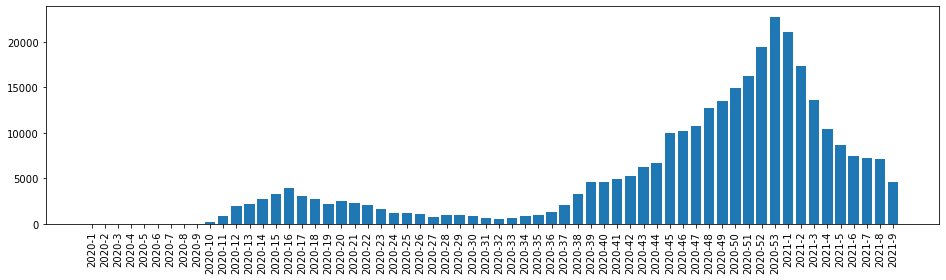

In [14]:
xAxis = caseCountByYearWeek['YearWeek'].tolist()
yAxis = np.array(caseCountByYearWeek['Case_Count'].tolist())

plt.figure(figsize=(16,4))
plt.bar(xAxis, yAxis)
plt.xticks(rotation=90)
plt.show()

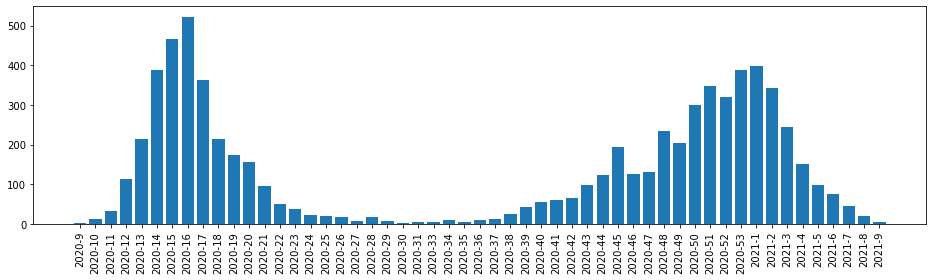

In [15]:
deathCountByYearWeek = caseDf.loc[caseDf.Outcome1 == 'Fatal'].groupby(['Case_Year','Case_WeekNo'])[[caseDate]].count().reset_index()
deathCountByYearWeek.rename(columns = {caseDate:'Case_Count'}, inplace = True) 
deathCountByYearWeek['YearWeek'] = deathCountByYearWeek['Case_Year'].astype(str) + '-' + deathCountByYearWeek['Case_WeekNo'].astype(str)
xAxis = deathCountByYearWeek['YearWeek'].tolist()
yAxis = np.array(deathCountByYearWeek['Case_Count'].tolist())

plt.figure(figsize=(16,4))
plt.bar(xAxis, yAxis)
#plt.ylim((0,20000))
plt.xticks(rotation=90)
plt.show()
